## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [2]:
!pip install tensorflow

     ------------------------------------- 266.3/266.3 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.4 MB/s eta 0:00:00
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 21.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 23.8 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 55.4 MB/s eta 0:00:00
     ---------------------------------------- 439.2/439.2 kB ? eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 23.9 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 48.2 MB/s eta 0:00:00
     ---------------------------------------- 177.2/177.2 kB 

In [1]:
#Tensorflow 설치하기
import tensorflow as tf
from tensorflow import keras

* 데이터 프레임 관련 라이브러리

In [2]:
#라이브러리 불러오기
import pandas as pd

### **나.  학습데이터 불러오기**

In [3]:
df = pd.read_csv('train.csv')
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


### **다.  데이터 전처리**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [5]:
# 중복된 데이터 삭제
del_columns=['url_num_query_para', 'url_hostname_len']
df.drop(del_columns, axis=1, inplace=True)

In [6]:
# 타겟 'label' 범주 -> 숫자로 변경
df['label_binary'] = df['label'].copy()
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,url_chinese_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,4.260333,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,malicious
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,4.636107,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,benign
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,3.708966,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,benign
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,4.025592,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,benign
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,4.631833,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,benign


In [7]:
df['label_binary'].replace({'benign':0, 'malicious':1}, inplace=True)
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,url_chinese_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,4.260333,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,1
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,4.636107,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,0
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,3.708966,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,0
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,4.025592,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,0
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,4.631833,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,0


In [8]:
# 결측치 처리
df.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [9]:
df['url_path_len'].interpolate(method='linear', inplace=True)
df['url_domain_len'].interpolate(method='linear', inplace=True)
df.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [10]:
# 불팔요한 변수 제거
del_columns = ['url_chinese_present', "html_num_tags('applet')", 'label']
df.drop(del_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3664 non-null   float64
 3   url_domain_len           3664 non-null   float64
 4   url_num_dots             3664 non-null   float64
 5   url_num_underscores      3664 non-null   float64
 6   url_query_len            3664 non-null   float64
 7   url_ip_present           3664 non-null   float64
 8   url_entropy              3664 non-null   float64
 9   url_port                 3664 non-null   float64
 10  html_num_tags('iframe')  3664 non-null   float64
 11  html_num_tags('script')  3664 non-null   float64
 12  html_num_tags('embed')   3664 non-null   float64
 13  html_num_tags('object')  3664 non-null   float64
 14  html_num_tags('div')    

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [11]:
target = 'label_binary'
x = df.drop(target, axis=1)
y = df.loc[:, target]

In [12]:
# train_test_split 사용
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2931, 19), (2931,), (733, 19), (733,))

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [14]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [15]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=5):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


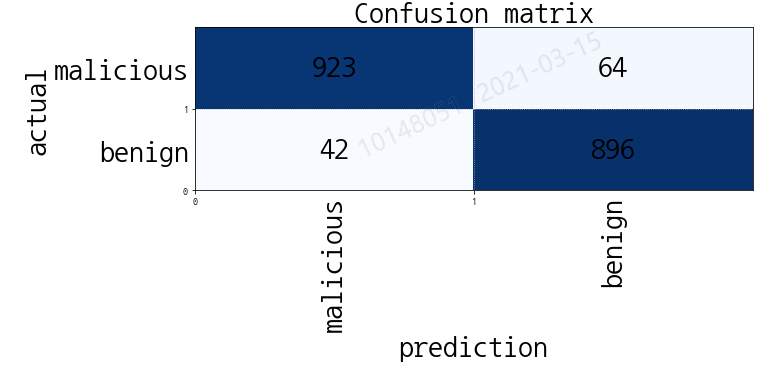

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [52]:
from sklearn.model_selection import cross_val_score

### - K-Nearest Neighbor

In [19]:
# K-Nearest Neighbor
# 정규화
x_max, x_min = x_train.max(), x_train.min()
x_train_n = (x_train - x_min) / (x_max - x_min)
x_test_n = (x_test - x_min) / (x_max - x_min)

# 1. import
from sklearn.neighbors import KNeighborsClassifier

# 2. 모델 선언
model_knn = KNeighborsClassifier(n_neighbors=5)

# 3. 학습
model_knn.fit(x_train_n, y_train)

KNeighborsClassifier()

In [20]:
# 4. 예측_
y_pred_knn = model_knn.predict(x_test_n)

# 5. 평가
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       370
           1       0.86      0.83      0.85       363

    accuracy                           0.85       733
   macro avg       0.85      0.85      0.85       733
weighted avg       0.85      0.85      0.85       733



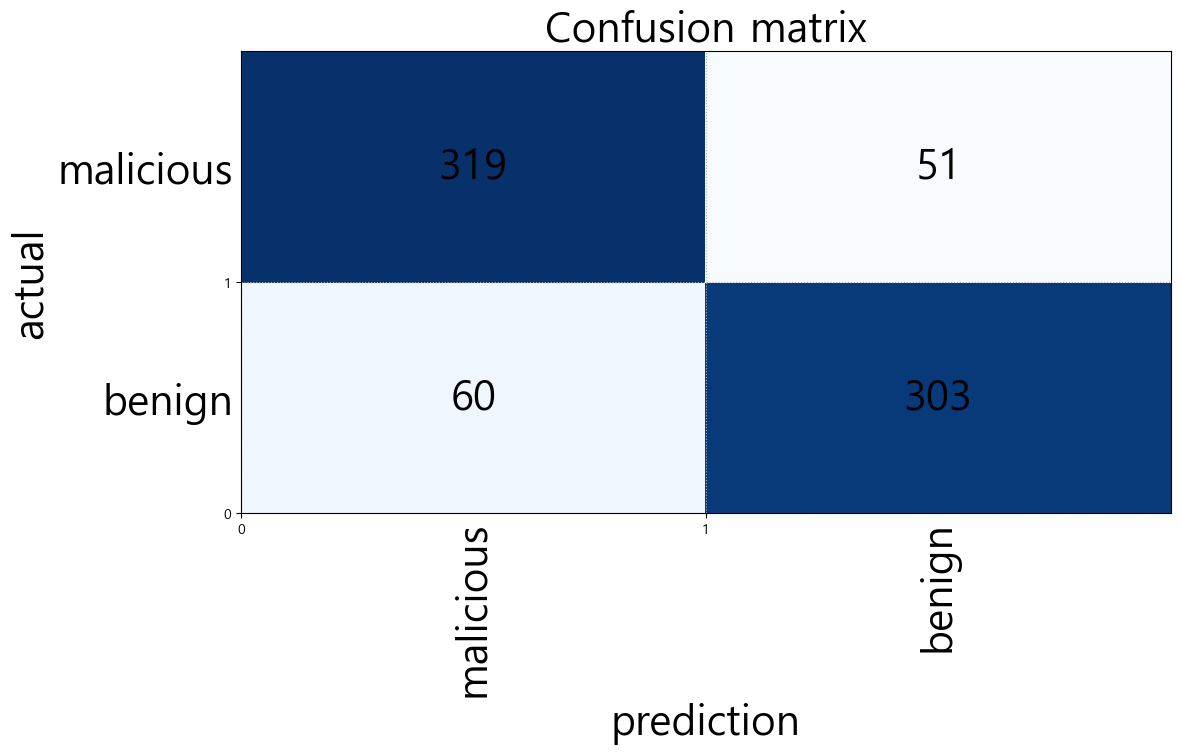

In [21]:
# 6. Test 데이터 결과 Confusion Matrix 확인
import matplotlib.pyplot as plt
import numpy as np

confusion = confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(12, 6))
plot_confusion_matrix(ax, confusion, fontsize=30)

### - Decision Tree

In [22]:
# Decision Tree
# 1. import
from sklearn.tree import DecisionTreeClassifier

# 2. 모델 선언
model_dtc = DecisionTreeClassifier(max_depth=5)

# 3. 학습
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:
# 4. 예측
y_pred_dtc = model_dtc.predict(x_test)

# 5. 평가
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

[[343  27]
 [ 42 321]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       370
           1       0.92      0.88      0.90       363

    accuracy                           0.91       733
   macro avg       0.91      0.91      0.91       733
weighted avg       0.91      0.91      0.91       733



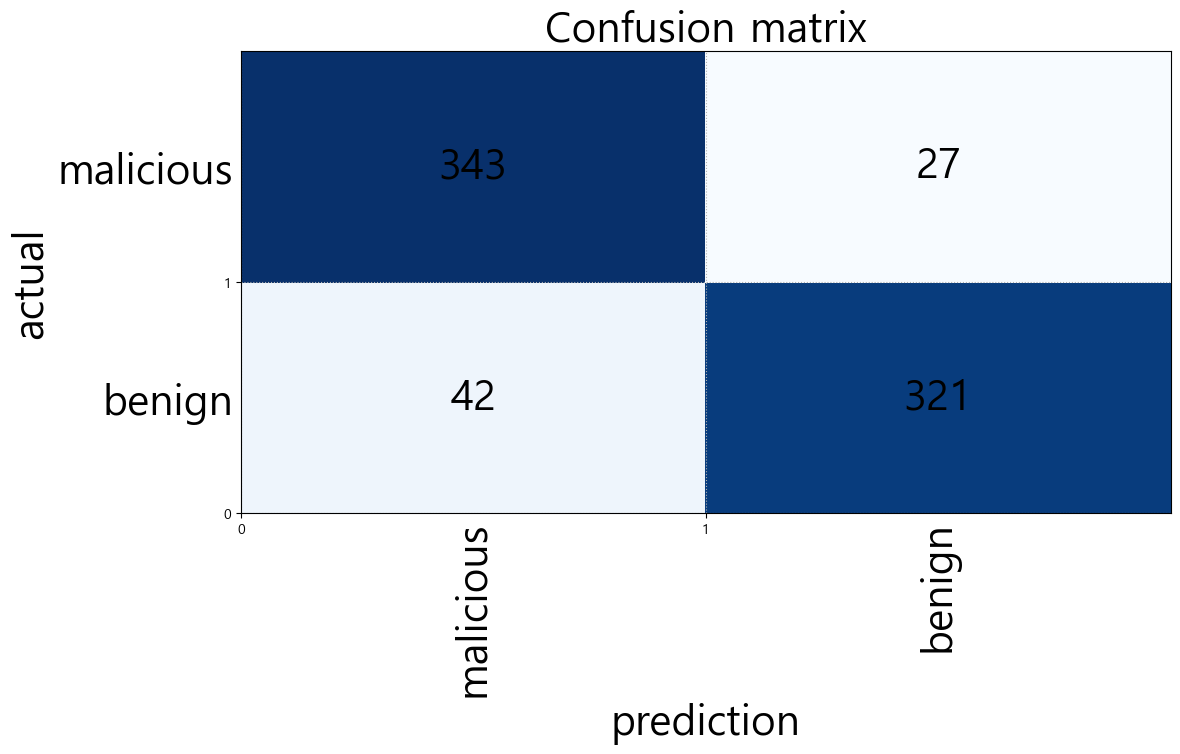

In [24]:
# 6. Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, y_pred_dtc)
fig, ax = plt.subplots(figsize=(12, 6))
plot_confusion_matrix(ax, confusion, fontsize=30)

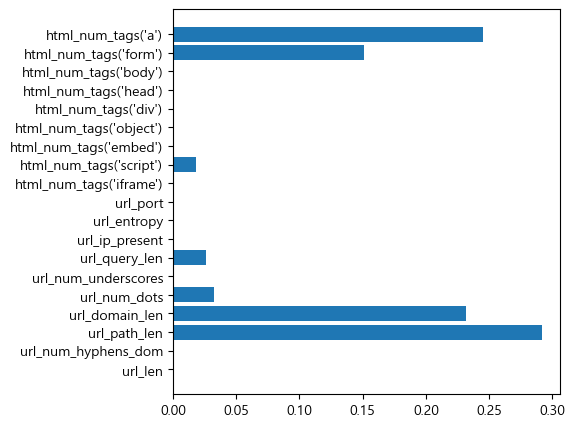

In [25]:
# 7. Feature(특징)별 가중치 확인
plt.figure(figsize=(5, 5))
plt.barh(list(x), model_dtc.feature_importances_)
plt.show()

### - Logistic Regression

In [26]:
# Logistic Regression
# 1. import
from sklearn.linear_model import LogisticRegression

# 2. 모델 선언
model_lr = LogisticRegression(max_iter=5000)

# 3. 학습
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [27]:
# 4. 예측
y_pred_lr = model_lr.predict(x_test)

# 5. 평가
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[330  40]
 [ 77 286]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       370
           1       0.88      0.79      0.83       363

    accuracy                           0.84       733
   macro avg       0.84      0.84      0.84       733
weighted avg       0.84      0.84      0.84       733



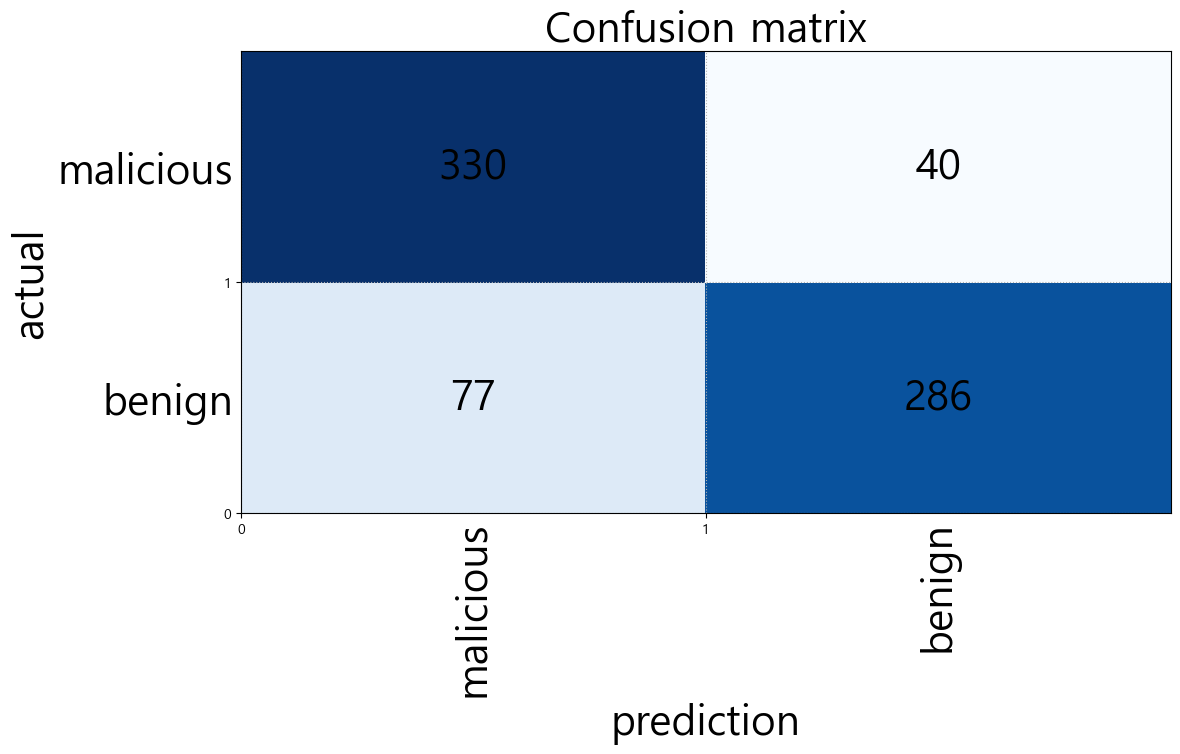

In [28]:
# 6. Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(12, 6))
plot_confusion_matrix(ax, confusion, fontsize=30)

### - SVM

In [29]:
# SVM
# 정규화
x_max, x_min = x_train.max(), x_train.min()
x_train_n = (x_train - x_min) / (x_max - x_min)
x_test_n = (x_test - x_min) / (x_max - x_min)

# 1. import
from sklearn.svm import SVC

# 2. 모델 선언
model_svc = SVC(kernel='linear', C=10)

# 3. 학습
model_svc.fit(x_train_n, y_train)

SVC(C=10, kernel='linear')

In [30]:
# 4. 예측
y_pred_svc = model_svc.predict(x_test_n)

# 5. 평가
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[330  40]
 [100 263]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       370
           1       0.87      0.72      0.79       363

    accuracy                           0.81       733
   macro avg       0.82      0.81      0.81       733
weighted avg       0.82      0.81      0.81       733



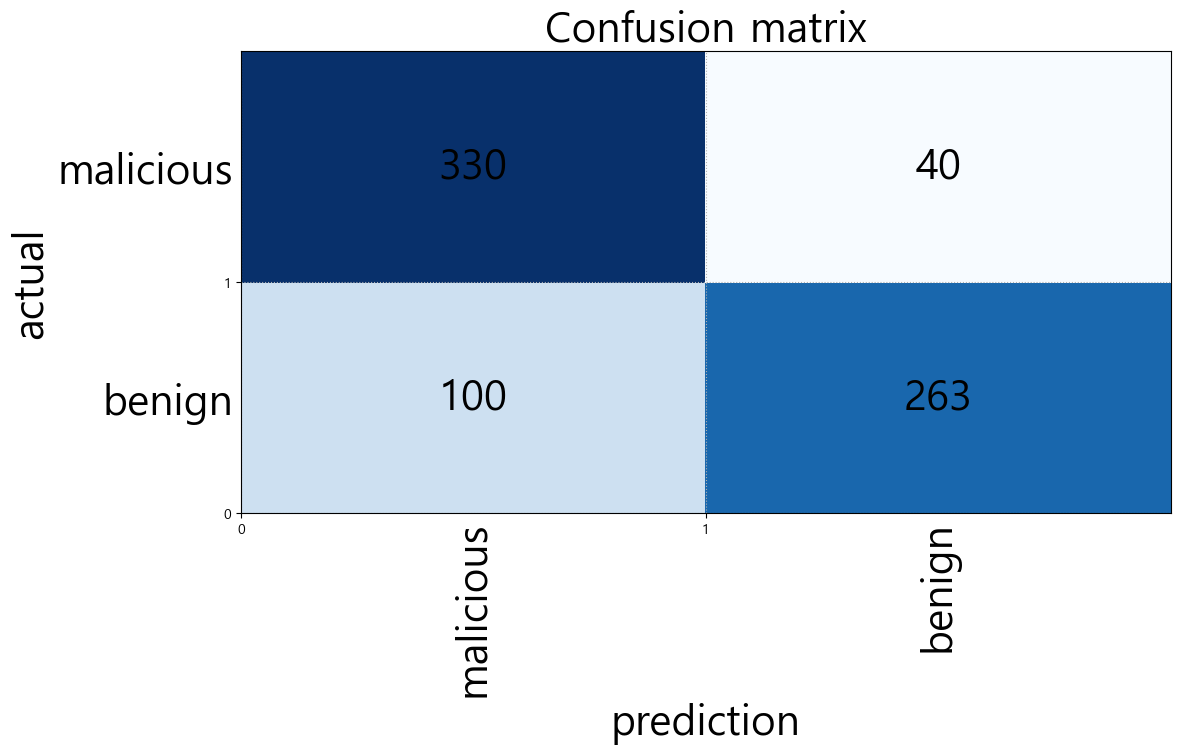

In [31]:
# 6. Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots(figsize=(12, 6))
plot_confusion_matrix(ax, confusion, fontsize=30)

### - RandomForestClassifier

In [35]:
# RandomForestClassifier
# 1. import
from sklearn.ensemble import RandomForestClassifier

# 2. 모델 선언
model_rfc = RandomForestClassifier(max_depth=5, random_state=1)

# 3. 학습
model_rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [36]:
# 4. 예측
y_pred_rfc = model_rfc.predict(x_test)

# 5. 평가
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[342  28]
 [ 26 337]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       370
           1       0.92      0.93      0.93       363

    accuracy                           0.93       733
   macro avg       0.93      0.93      0.93       733
weighted avg       0.93      0.93      0.93       733



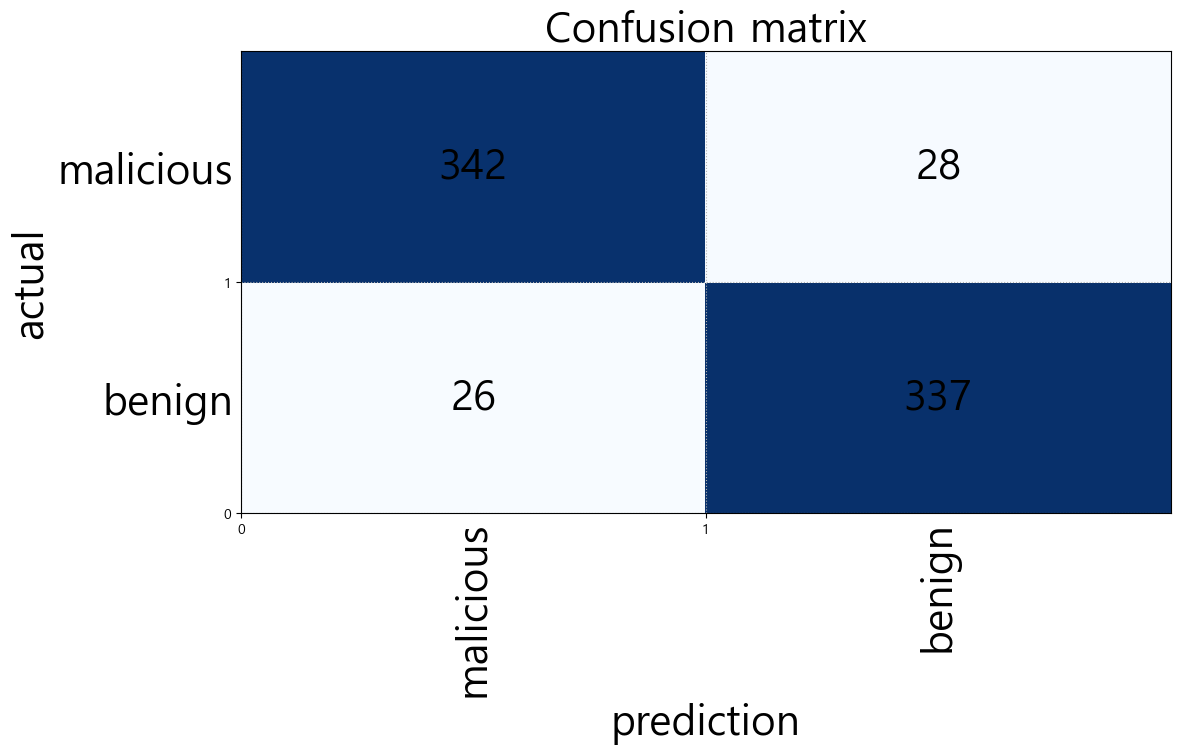

In [37]:
# 6. Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, y_pred_rfc)
fig, ax = plt.subplots(figsize=(12, 6))
plot_confusion_matrix(ax, confusion, fontsize=30)

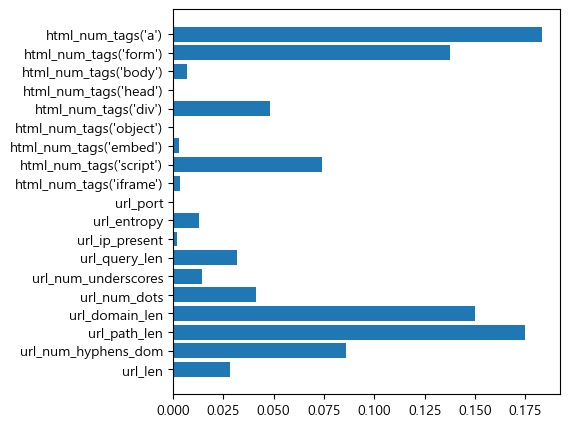

In [38]:
# 7. Feature(특징)별 가중치 확인
plt.figure(figsize=(5, 5))
plt.barh(list(x), model_rfc.feature_importances_)
plt.show()

### - XGBoost

In [44]:
# XGBoost
# 1. import 
from xgboost import XGBClassifier

# 2. 모델 선언
model_xgb = XGBClassifier(max_depth=5, random_state=1)

# 3. 모델 학습
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [45]:
# 4. 예측
y_pred_xgb = model_xgb.predict(x_test)

# 5. 평가
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[360  10]
 [ 12 351]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       370
           1       0.97      0.97      0.97       363

    accuracy                           0.97       733
   macro avg       0.97      0.97      0.97       733
weighted avg       0.97      0.97      0.97       733



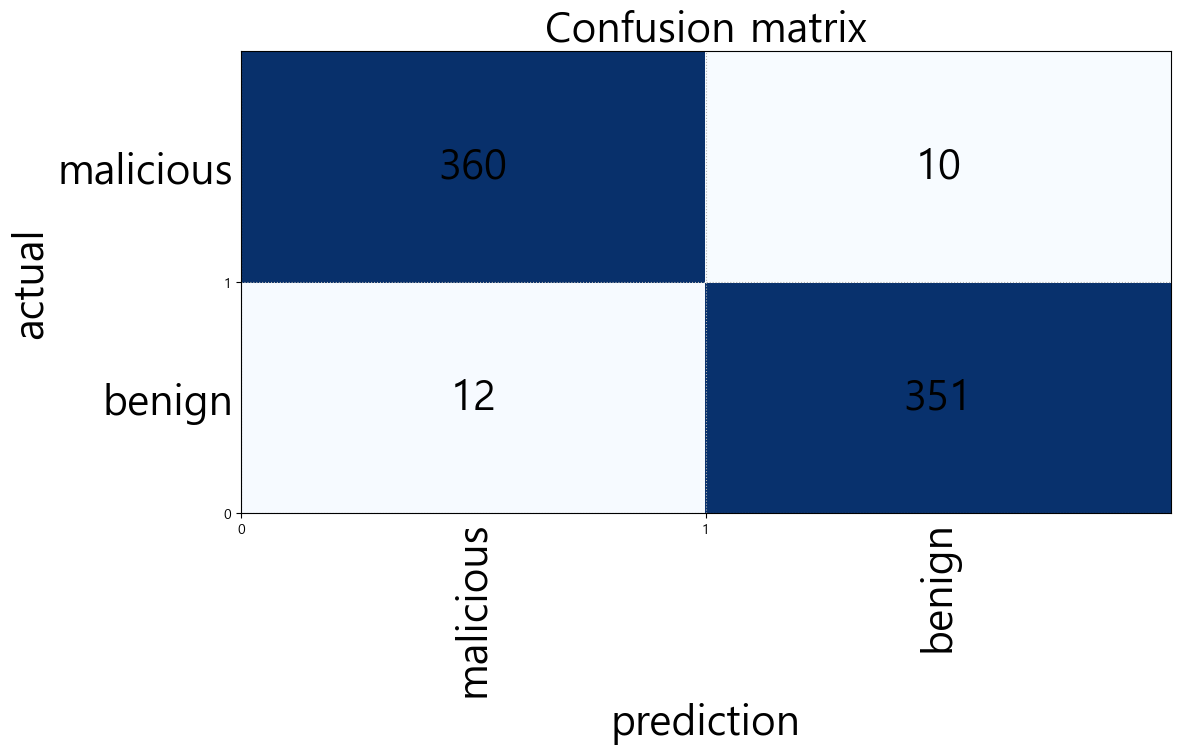

In [46]:
# 6. Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, y_pred_xgb)
fig, ax = plt.subplots(figsize=(12, 6))
plot_confusion_matrix(ax, confusion, fontsize=30)

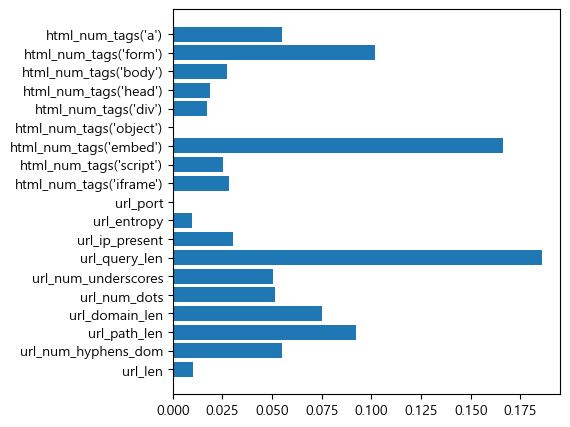

In [47]:
# 7. Feature(특징)별 가중치 확인
plt.figure(figsize=(5, 5))
plt.barh(list(x), model_xgb.feature_importances_)
plt.show()

### - LightGBM

In [48]:
# LightGBM
# 1. import
from lightgbm import LGBMClassifier

# 2. 모델 선언
model_lgbm = LGBMClassifier(max_depth=5, random_state=1)

# 3. 학습
model_lgbm.fit(x_train, y_train)

LGBMClassifier(max_depth=5, random_state=1)

In [49]:
# 4. 예측
y_pred_lgbm = model_lgbm.predict(x_test)

# 5. 평가
print(confusion_matrix(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

[[356  14]
 [ 14 349]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       370
           1       0.96      0.96      0.96       363

    accuracy                           0.96       733
   macro avg       0.96      0.96      0.96       733
weighted avg       0.96      0.96      0.96       733



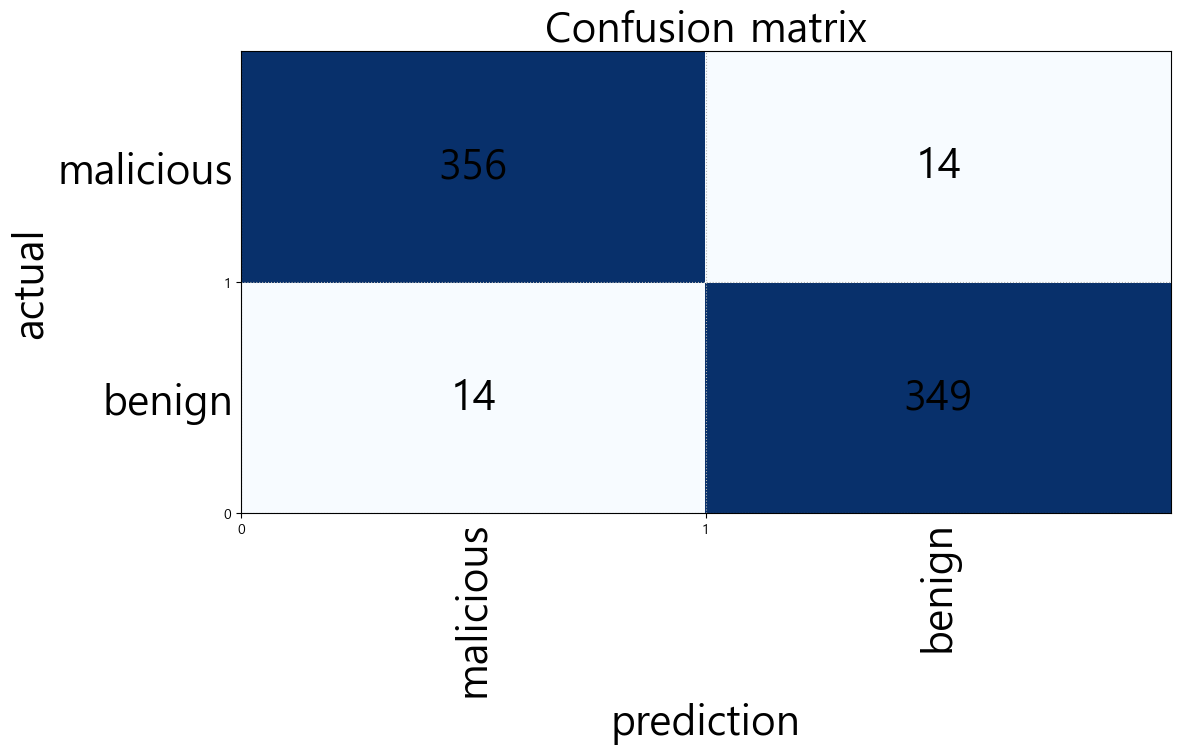

In [50]:
# 6. Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, y_pred_lgbm)
fig, ax = plt.subplots(figsize=(12, 6))
plot_confusion_matrix(ax, confusion, fontsize=30)

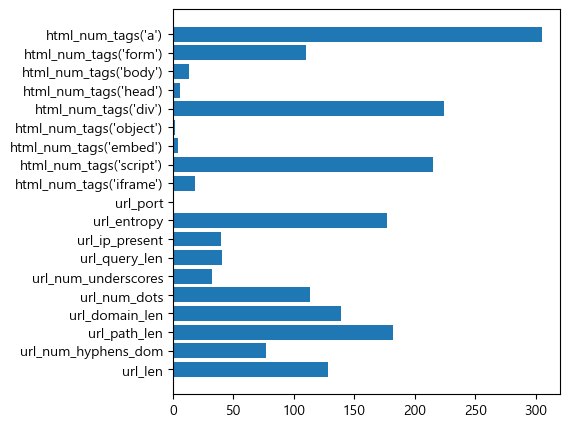

In [51]:
# 7. Feature(특징)별 가중치 확인
plt.figure(figsize=(5, 5))
plt.barh(list(x), model_lgbm.feature_importances_)
plt.show()

## - k-Fold Cross Validation

In [54]:
result = {}
cv_score_knn = cross_val_score(model_knn, x_train_n, y_train, cv=10, scoring='accuracy')
result['knn'] = cv_score_knn.mean()
cv_score_dtc = cross_val_score(model_dtc, x_train, y_train, cv=10, scoring='accuracy')
result['dtc'] = cv_score_dtc.mean()
cv_score_lr = cross_val_score(model_lr, x_train, y_train, cv=10, scoring='accuracy')
result['lr'] = cv_score_lr.mean()
cv_score_svc = cross_val_score(model_svc, x_train_n, y_train, cv=10, scoring='accuracy')
result['svc'] = cv_score_svc.mean()
cv_score_rfc = cross_val_score(model_rfc, x_train, y_train, cv=10, scoring='accuracy')
result['rfc'] = cv_score_rfc.mean()
cv_score_xgb = cross_val_score(model_xgb, x_train, y_train, cv=10, scoring='accuracy')
result['xgb'] = cv_score_xgb.mean()
cv_score_lgbm = cross_val_score(model_lgbm, x_train, y_train, cv=10, scoring='accuracy')
result['lgbm'] = cv_score_lgbm.mean()

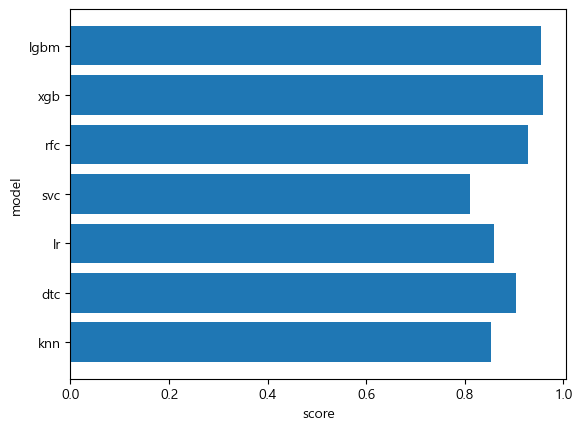

In [55]:
# 성능 시각화
plt.barh(y=list(result), width=result.values())
plt.xlabel('score')
plt.ylabel('model')
plt.show()

# <b>RandomForest GridSearchCV
### 만족할만한 하이퍼파라미터 조합을 찾는 단순한 방법은 수동으로 하이퍼파라미터를 조정하면서 찾는 방법입니다.
### GridSearchcv는 자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적의 하이퍼파라미터를 탐색해 줍니다.
### 탐색하고자 하는 하이퍼파라미터를 지정하면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가하게 됩니다.


* 주요 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">param_grid</td><td>파라미터 딕셔너리</td>
    </tr>
    <tr>
        <td align="center">scoring</td><td>예측 성능을 측정할 평가 방법</td>
    </tr>
    <tr>
        <td align="center">cv</td><td>교차 검증을 위해 분할되는 폴드 수</td>
    </tr>
</table>

**<span style="color:green">[참고링크] 공식 Document**</span>
 
* GridSearchCV(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* model evaluation(https://scikit-learn.org/stable/modules/model_evaluation.html)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### - GridSearch : XGBoost

In [69]:
# 모델 튜닝
params = {'max_depth':range(1, 51)}

model_xgb2 = XGBClassifier(random_state=1)

# Grid Search 선언
model_xgb_gs = GridSearchCV(model_xgb2,
                            params,
                            cv=10,
                            scoring='accuracy')

# 학습
model_xgb_gs.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, ...),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

In [70]:
# 결과 확인
print(model_xgb_gs.cv_results_['mean_test_score'])
print(f'최적 파라미터 : {model_xgb_gs.best_params_} 최고 성능 : {model_xgb_gs.best_score_}')

[0.92970908 0.9457512  0.95633025 0.9573553  0.95803557 0.95769311
 0.9573553  0.9549639  0.95871584 0.95530635 0.95666922 0.95769079
 0.95803209 0.95973857 0.95837454 0.95666922 0.95769311 0.95769311
 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311
 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311
 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311
 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311
 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311 0.95769311
 0.95769311 0.95769311]
최적 파라미터 : {'max_depth': 14} 최고 성능 : 0.9597385711963966


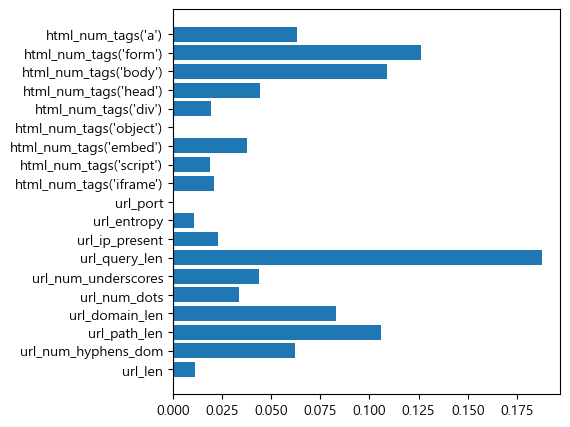

In [71]:
# 변수 중요도
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model_xgb_gs.best_estimator_.feature_importances_)
plt.show()

In [72]:
# 예측
y_pred_xgb_gs = model_xgb_gs.predict(x_test)

# 평가
print(confusion_matrix(y_test, y_pred_xgb_gs))
print(classification_report(y_test, y_pred_xgb_gs))

[[360  10]
 [  9 354]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       370
           1       0.97      0.98      0.97       363

    accuracy                           0.97       733
   macro avg       0.97      0.97      0.97       733
weighted avg       0.97      0.97      0.97       733



### - GridSearch : RandomForest

In [73]:
# 모델 튜닝
params = {'max_depth':range(1, 51)}

model_rfc2 = RandomForestClassifier(random_state=1)

# Grid Search 선언
model_rfc_gs = GridSearchCV(model_rfc2,
                            params,
                            cv=10,
                            scoring='accuracy')

# 학습
model_rfc_gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

In [74]:
# 결과 확인
print(model_rfc_gs.cv_results_['mean_test_score'])
print(f'최적 파라미터 : {model_rfc_gs.best_params_} 최고 성능 : {model_rfc_gs.best_score_}')

[0.86728541 0.88536254 0.91026909 0.91777182 0.92766711 0.93312902
 0.93858513 0.94711755 0.94745536 0.9505282  0.95428362 0.95564881
 0.95837571 0.95803557 0.96008335 0.96008219 0.96076478 0.96144622
 0.96247011 0.963494   0.9631527  0.963494   0.9638353  0.963494
 0.963494   0.963494   0.963494   0.963494   0.963494   0.963494
 0.963494   0.963494   0.963494   0.963494   0.963494   0.963494
 0.963494   0.963494   0.963494   0.963494   0.963494   0.963494
 0.963494   0.963494   0.963494   0.963494   0.963494   0.963494
 0.963494   0.963494  ]
최적 파라미터 : {'max_depth': 23} 최고 성능 : 0.9638352952102343


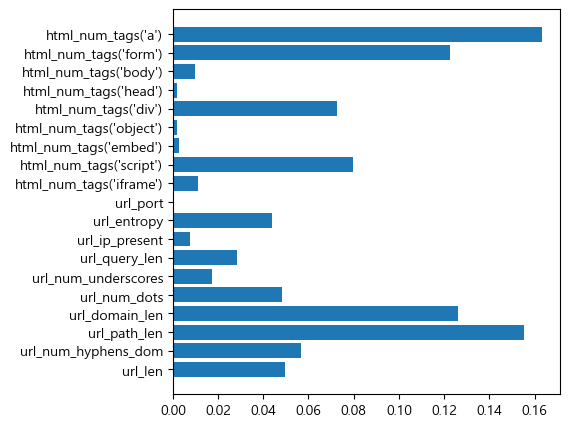

In [75]:
# 변수 중요도
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model_rfc_gs.best_estimator_.feature_importances_)
plt.show()

In [76]:
# 예측
y_pred_rfc_gs = model_rfc_gs.predict(x_test)

# 평가
print(confusion_matrix(y_test, y_pred_rfc_gs))
print(classification_report(y_test, y_pred_rfc_gs))

[[357  13]
 [ 11 352]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       370
           1       0.96      0.97      0.97       363

    accuracy                           0.97       733
   macro avg       0.97      0.97      0.97       733
weighted avg       0.97      0.97      0.97       733

